# Week 3 - Large Language Models

## 1
<b>Download the Yelp review dataset “Yelp/yelp_review_full”. Split each sample by calling the string method “.split()” and choose the correct statements about the dataset.

- A. The dataset contains close to 99 million words
- B. There are more than 300 samples that contain a single word
- C. There are less than 300 samples that contain only a single word
- D. “Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for.” is one of the single words in the dataset
- E. The average length of a sample is 134.1
- F. The distribution of the length of the samples is right skewed
<b>

In [71]:
from datasets import load_dataset
try:
    ds = load_dataset("Yelp/yelp_review_full", split="all")
    print(ds)
except Exception as e:
    print("ERROR:",e)

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})


In [72]:
import os
procs = os.cpu_count()
print("No. of processors =", os.cpu_count())

def modify(sample):
    sample['num_word'] = len(sample['text'].split())
    return sample
ds = ds.map(modify, batch_size=7000, num_proc=procs)    
print(ds)

No. of processors = 12
Dataset({
    features: ['label', 'text', 'num_word'],
    num_rows: 700000
})


total = 93878307
samples > 1 word = 355
average sample length = 134.11186714285714
has Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on-top.\nTo-die-for. = 1


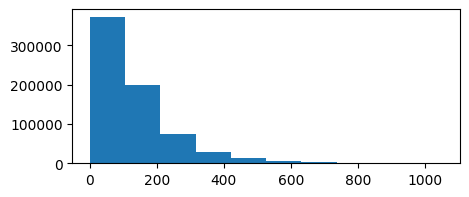

In [73]:
import numpy as np
from matplotlib import pyplot as plt
try:
    num_words = ds['num_word']
    total_words = sum(num_words)
    print(f"total = {total_words}")
    print(f"samples > 1 word = {np.sum(np.array(num_words)==1)}")
    print(f"average sample length = {total_words/ds.num_rows}")
    st = 'Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on-top.\\nTo-die-for.'
    fil_ds = ds.filter(lambda sample, st=st: sample['text'] == st, num_proc=procs)
    print(f"has {st} = {len(fil_ds)}")
    plt.figure(figsize=(5,2))
    plt.hist(num_words)
    plt.show()
except Exception as e:
    print("ERROR:",e)

## 2
<b>Load the “bert-base-uncased” pre-trained tokenizer and choose the correct statements about the tokenizer.
- A. The tokenizer is used for the BERT model with the context length of 512
- B. The tokenizer has 5 special tokens
- C. Tokenizing a sample that contains more than 512 words would result in truncation of all tokens beyond the length 512
- D. Tokenizer inserts all the special tokens when it processes a single sample as an input
- E. Tokenizer inserts [CLS] and [SEP] special tokens when it processes a single sample as an input
- F. Tokenizer inserts only [CLS]special token when it processes a single sample as an input
<b>

In [74]:
from transformers import AutoTokenizer
from pprint import pprint
try:
    bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    pprint(bert_tokenizer)
    print(f"B. {len(bert_tokenizer.all_special_tokens) == 5}")
except Exception as e:
    print("ERROR:",e)

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)
B. True


In [75]:
s_ds = ds.filter(lambda sample: sample['num_word'] > 512)
print(s_ds)

example = s_ds[0]
print(example)

tokenized_sample = bert_tokenizer(example['text'])
print(len(tokenized_sample['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1019 > 512). Running this sequence through the model will result in indexing errors


Dataset({
    features: ['label', 'text', 'num_word'],
    num_rows: 12441
})
{'label': 4, 'text': "After a morning of Thrift Store hunting, a friend and I were thinking of lunch, and he suggested Emil's after he'd seen Chris Sebak do a bit on it and had tried it a time or two before, and I had not. He said they had a decent Reuben, but to be prepared to step back in time.\\n\\nWell, seeing as how I'm kind of addicted to late 40's and early 50's, and the whole Rat Pack scene, stepping back in time is a welcomed change in da burgh...as long as it doesn't involve 1979, which I can see all around me every day.\\n\\nAnd yet another shot at finding a decent Reuben in da burgh...well, that's like hunting the Holy Grail. So looking under one more bush certainly wouldn't hurt.\\n\\nSo off we go right at lunchtime in the middle of...where exactly were we? At first I thought we were lost, driving around a handful of very rather dismal looking blocks in what looked like a neighborhood that had be

In [76]:
example = "single sample"
tokens = bert_tokenizer.convert_ids_to_tokens(bert_tokenizer(example)['input_ids'])
print(tokens)                                         

['[CLS]', 'single', 'sample', '[SEP]']


## 3
<b>Use “BertConfig” and “BertForMaskedLM” to construct the default (original) BERT model. Choose the correct statements
- A. The model has 12 Bert layers
- B. The model has 6 Bert layers
- C. The model uses absolute position embeddings
- D. The word embedding (token embedding) layer has about 23 million learnable parameters
- E. The total number of parameters in the model is close to 110 million<b>

In [77]:
from transformers import BertConfig, BertForMaskedLM
config = BertConfig()
pprint(config)
print('-'*100)
model = BertForMaskedLM(config)
print(model)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

----------------------------------------------------------------------------------------------------
BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): B

In [78]:
params = 0
for param in model.parameters():
    params += param.numel()
print(params)

109514298


In [79]:
(30522*768 + 512*768 + 2*768) + (3*768*768 + 768*768 + 768*3072 + 3072*768)*12 + (768*768 + 768*30522)

132801024

## 4
<b>Double the context length from 512 to 1024 (you can change it in the configuration). Count the number of parameters and enter the change in the number of parameters (in millions) compared to the default configuration.<b>

In [80]:
config2 = BertConfig(max_position_embeddings=1024)
model2 = BertForMaskedLM(config2)
params2 = 0
for param in model2.parameters():
    params2 += param.numel()
print(params2)
print((params2-params)/10**6)

109907514
0.393216


## 5
<b>Pack (chunk) the samples such that the length of all the samples in the dataset is 512 (for efficient training). Define a mapping function that implements the following procedure
 1. Take a batch of 1000 samples
 2. Tokenize it to get input IDs and attention mask
 3. Concatenate all the input IDs
 4. Chunk the concatenated IDs into a size of 512
 5. Drop the last chunk if its length is less than 512
 6. Pack all the chunks
 7. Iterate over all the batches in the dataset 
 
Store the resulting dataset in the variable “ds_chunked”. Enter the total number of samples in the new dataset.
Note: the batch size should be kept at 1000 while calling "ds.map()" for theanswer to match.
<b>

In [93]:
def chunk(samples, tokenizer = bert_tokenizer):
    samples = tokenizer(samples['text'])
    concat_inps = sum([seq for seq in samples['input_ids']],[])
    total_tokens = len(concat_inps)
    num_contx_samples = total_tokens // 512

    inp_id_list, att_mask_list = [], []
    for i in range(0, num_contx_samples):
        inp_ids = concat_inps[i*512:(i+1)*512]
        att_masks = [1]*512
        inp_id_list.append(inp_ids)
        att_mask_list.append(att_masks)
    
    return {'input_ids': inp_id_list, 'attention_mask': att_mask_list}

ds_chunked = ds.map(chunk,
    batch_size=1000,
    batched = True,
    num_proc = procs,
    remove_columns = ['label', 'text', 'num_word'])    

Map (num_proc=12): 100%|██████████| 700000/700000 [10:51<00:00, 1074.69 examples/s]


In [94]:
ds_chunked

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 246703
})

## 6
<b>

- Split the new dataset into training and test sets with the test_size=0.05 and seed=42.
- Use the appropriate data collator function for the MLM objective and set the masking probability to 0.2. 
- Use the data loader from PyTorch to load a batch of samples, and enter the token ID corresponding to the unmasked token
</b>

In [100]:
from transformers import DataCollatorForLanguageModeling
from torch.utils.data import DataLoader

ds_split = ds_chunked.train_test_split(test_size = 0.5, seed=42)
data_collator = DataCollatorForLanguageModeling(bert_tokenizer,
                mlm = True,
                mlm_probability = 0.2)
dataloader = DataLoader(dataset = ds_split['train'],
                collate_fn = data_collator,
                batch_size=2)
pprint(next(iter(dataloader)))

{'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]),
 'input_ids': tensor([[ 103, 2070, 2052,  ..., 2015, 1010,  103],
        [2074,  103, 2001,  ..., 1013, 7479, 1012]]),
 'labels': tensor([[3241, -100, -100,  ..., -100, -100, 5404],
        [-100, 2003, -100,  ..., -100, -100, -100]])}


## 7
<b>Create a small BERT model by changing the following hyper-parameters and keeping the other hyper-parameters as it is
- num_hidden_layers = 6
- hidden size: 384
- intermediate_size: 1536

and start training the model with a batch of size 8 for an epoch. What is the loss value at the end of the training?

Note: You may optionally save the checkpoints for every N-th step.<b>

1. Define bert Config
2. load bert
3. tokenize ds
4. Data collator
5. Data Loader
6. Setup (optimize)
7. Train

In [ ]:
# config_small = BertConfig(num_hidden_layers=6,
#                             hidden_size = 384,
#                             intermediate_size=1536)

# bert_small = BertForMaskedLM(config_small)
# print(bert_small)

# def tokenize(samples, tokenizer=bert_tokenizer):
#     return tokenizer(samples['text'])

# train_ds = ds.map(tokenize, batch_size=8, batched=True)




In [101]:
ds

Dataset({
    features: ['label', 'text', 'num_word'],
    num_rows: 700000
})